In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio

In [3]:
fname = "/home/garid/myGithub/spectrumCatcher/spectrumCatcher/tests/dname1221/13h_/rawBMPs/20191221_111939_1.bmp"

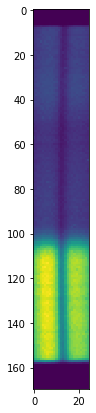

In [4]:
img = np.rot90(imageio.imread(fname), k = 3)
plt.figure(figsize= (1,12))
plt.imshow(img[230:400,220:245])
plt.show()

In [5]:
def locallyNormalizedIamge(arr, halfWindowSize = 5):
    asdf = np.zeros((arr.shape[0], arr.shape[1]))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            lWindowPos = (j-halfWindowSize) * ((j-halfWindowSize) > 0 )
            rWindowPos = (j+halfWindowSize) * ((j-halfWindowSize) < arr.shape[1])
            minVal_inWindow = np.min(arr[i, lWindowPos:rWindowPos])#, axis = 1)
            maxVal_inWindow = np.max(arr[i, lWindowPos:rWindowPos])#, axis = 1)
            if (minVal_inWindow == maxVal_inWindow):
                asdf[i, j] = 0
            else:
                asdf[i, j] = (arr[i,j] - minVal_inWindow) / (maxVal_inWindow - minVal_inWindow)
    return asdf

def shapes(asdf):
    plt.figure(figsize = (30,10))
    for i in range(asdf.shape[0]):
        plt.plot(asdf[i, :], 'gray', linewidth = 0.3)


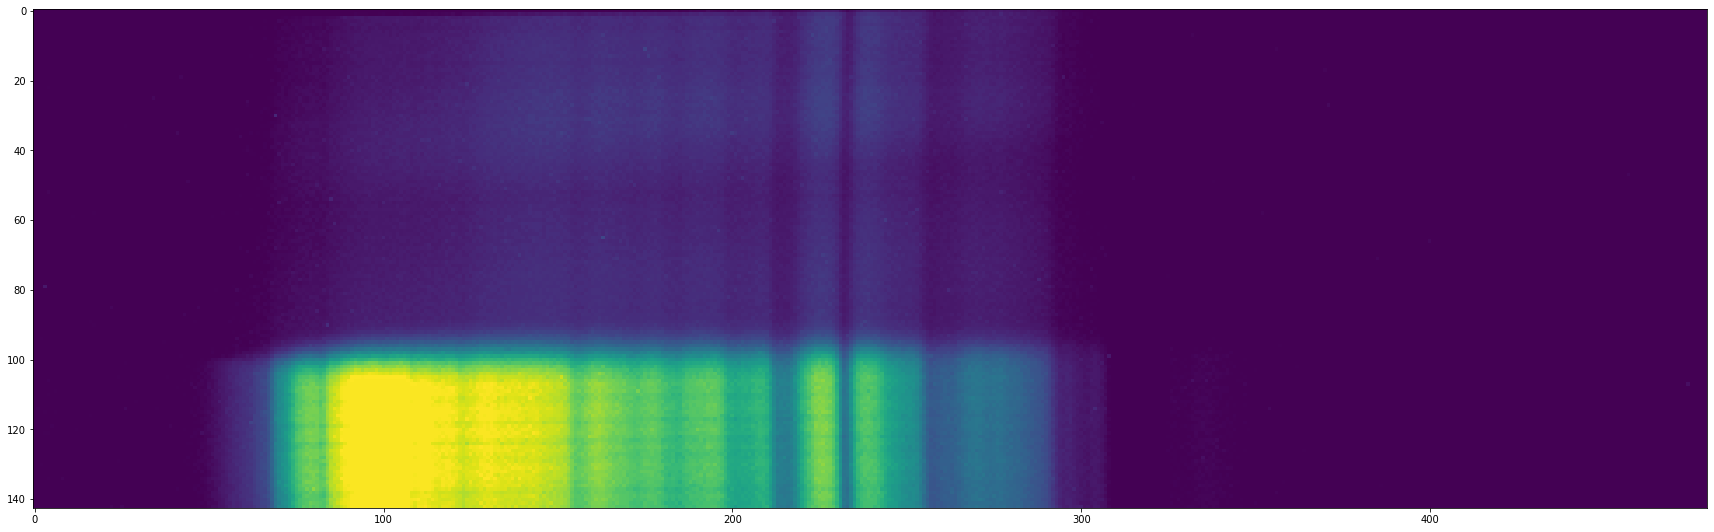

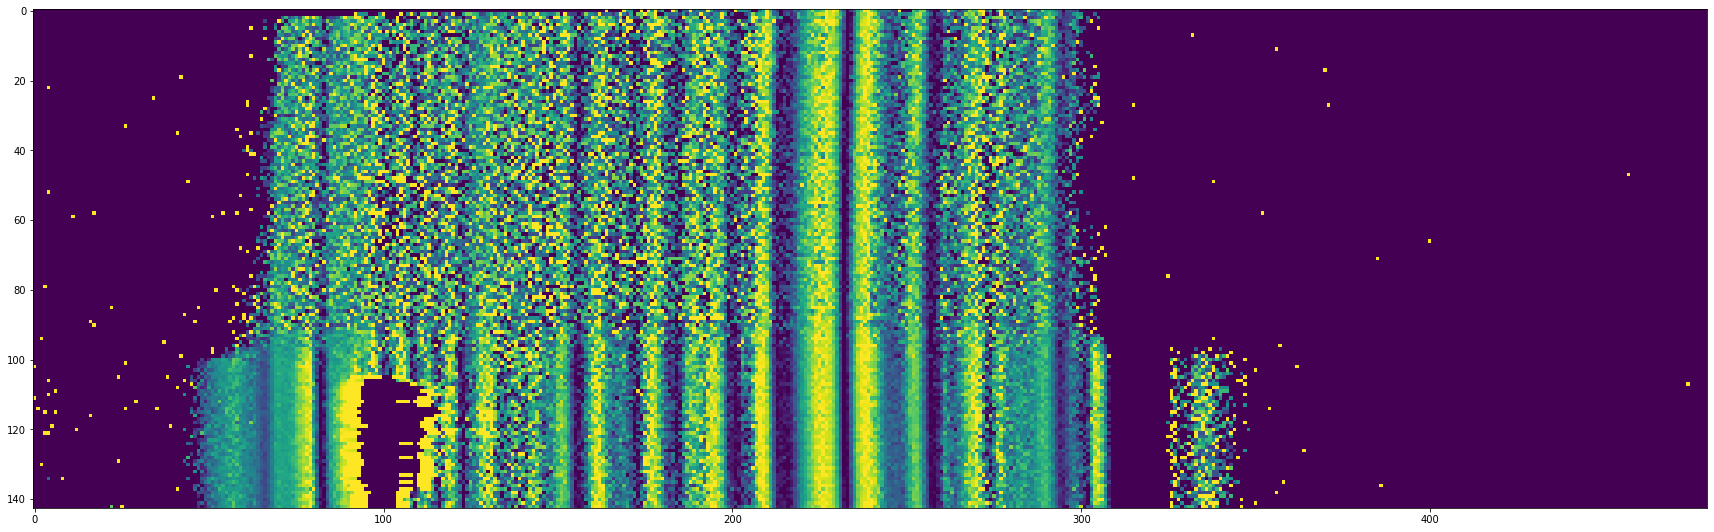

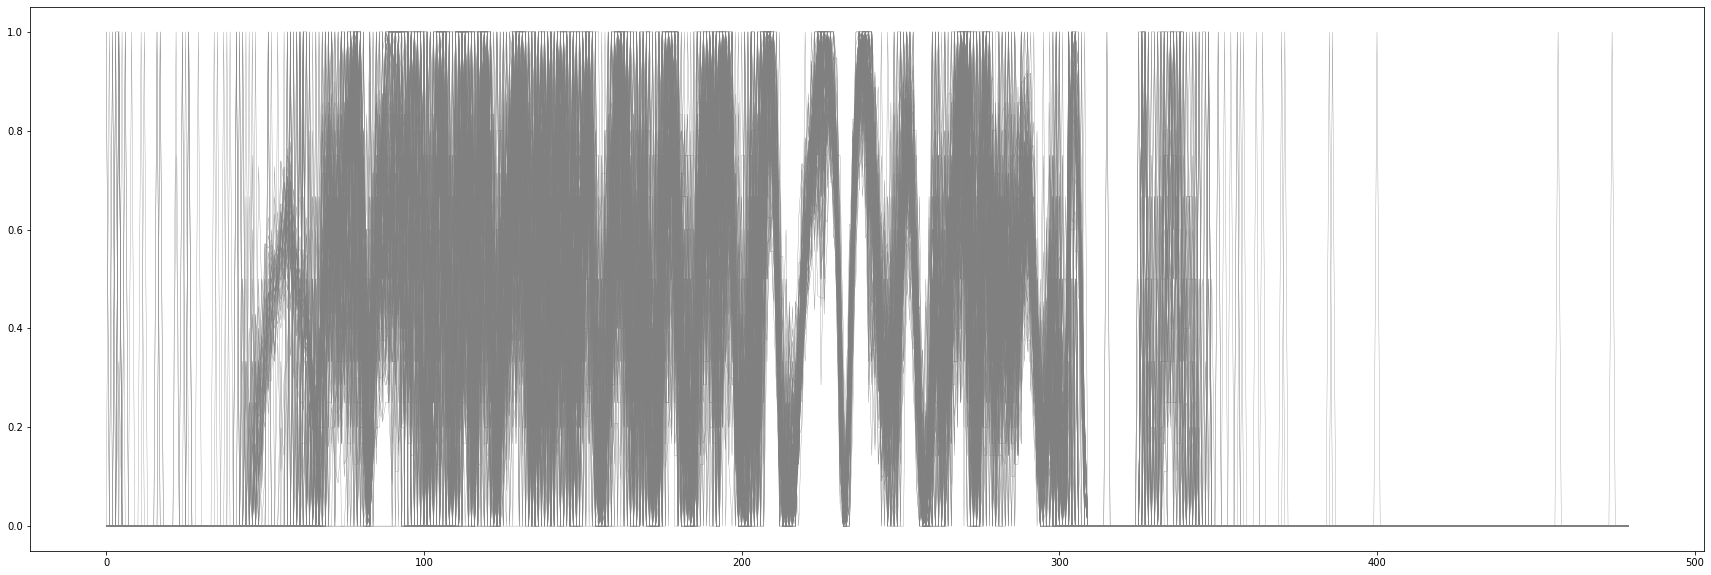

In [6]:
image = img[237:380,:]

plt.figure(figsize = (30,10))
plt.imshow(image)
plt.figure(figsize = (30,10))
plt.imshow(locallyNormalizedIamge(image))
aimage = locallyNormalizedIamge(image) 
shapes(aimage)

(15, 143)

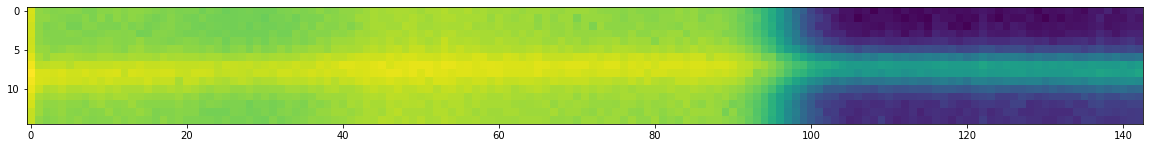

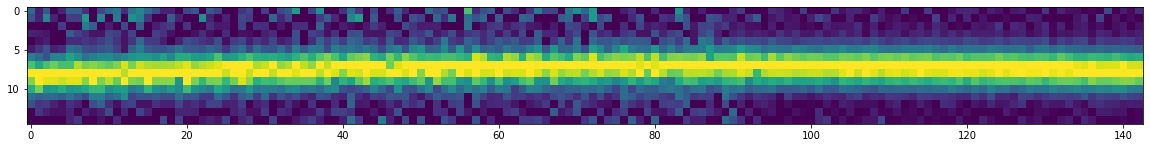

In [7]:
plt.figure(figsize = (20,5))
plt.imshow(1- image[:,225:240].T)
plt.figure(figsize = (20,5))
bimg = 1- aimage[:,225:240].T
plt.imshow(bimg)
bimg.shape

In [8]:
X = np.zeros((4,143))
X[0,:] = 1
X[1,:] = np.arange(143)
X[2,:] = np.arange(143) * np.arange(143) 
X[3,:] = np.arange(143) * np.arange(143) * np.arange(143)

X_ = np.zeros((4,143))
X_[0,:] = 0
X_[1,:] =  (X[1,:] - np.mean(X[1,:])) / np.std(X[1,:])
X_[2,:] =  (X[2,:] - np.mean(X[2,:])) / np.std(X[2,:])
X_[3,:] =  (X[3,:] - np.mean(X[3,:])) / np.std(X[3,:])

Y = np.copy(bimg)


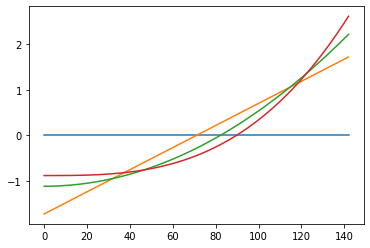

In [9]:
plt.plot(X_[0,:])
plt.plot(X_[1,:])
plt.plot(X_[2,:])
plt.plot(X_[3,:])

In [10]:
# def myFunction(xx1 = np.arange(143), t0123 = np.random.rand(4,1)/100000):
#     xx0123 = np.zeros((xx1.shape[0], t0123.shape[0]))
#     xx0123[:,0] = 0
#     xx0123[:,1] = xx1
#     for i in range(2, t0123.shape[0]):
#         xx0123[:,i] = xx0123[:,i-1] * xx1
#     return np.matmul(xx0123, t0123)


def HROW(Xval, theta):
    return np.matmul(theta.T, Xval)

def someStrangeFUnction(Xval, theta, Yval):
    L = np.zeros((Yval.shape[0], Yval.shape[1]))
    L[:,:] = np.arange(Yval.shape[0]).reshape(Yval.shape[0], 1)
    return np.sum((HROW(Xval, theta)-L) * Yval * Yval)

def probing_cost(Xval, theta, Yval):
    L = np.zeros((Yval.shape[0], Yval.shape[1]))
    L[:,:] = np.arange(Yval.shape[0]).reshape(Yval.shape[0], 1)
    return np.sum(((HROW(Xval, theta)-L) * Yval)**2)

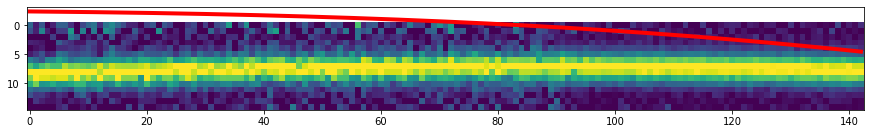

In [11]:
t0123 = np.random.rand(4,1)
t0123
currentCurve = HROW(X_,t0123)

plt.figure(figsize=(15,5))
plt.imshow(bimg)
plt.plot(currentCurve[0,:], 'r', linewidth = 4)

27721.66199323906


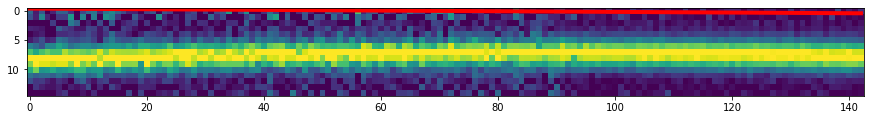

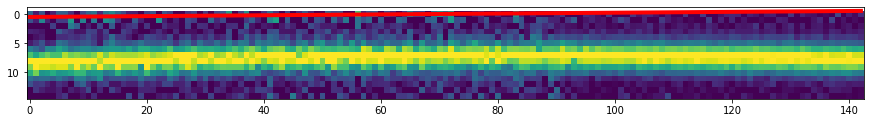

27939.669976702764


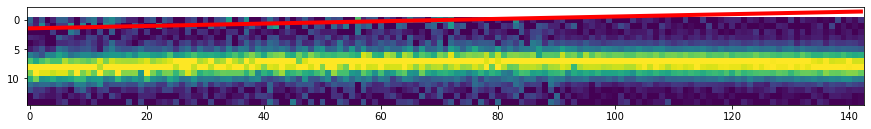

28430.96664341271


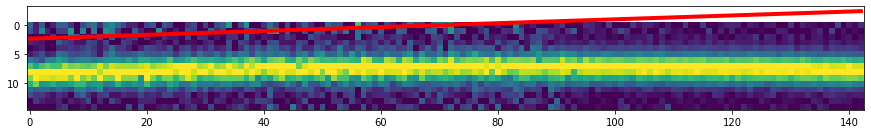

29195.017735618305


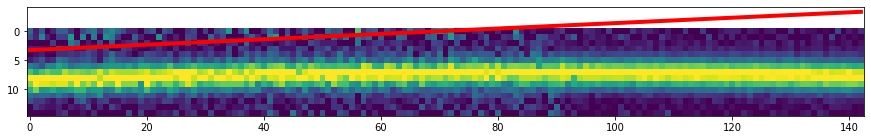

30231.289807678397


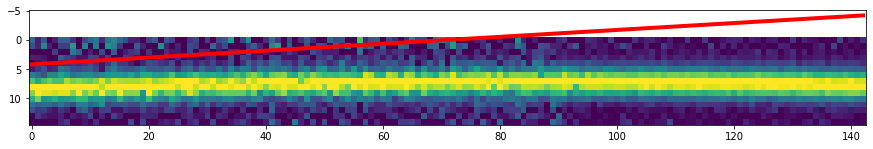

31539.250224927564


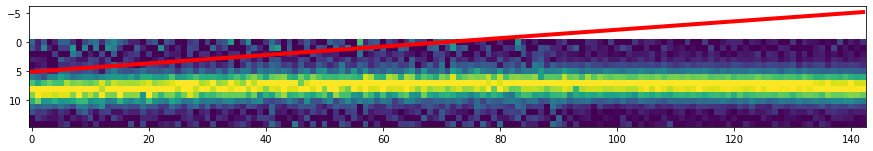

33118.36716254477


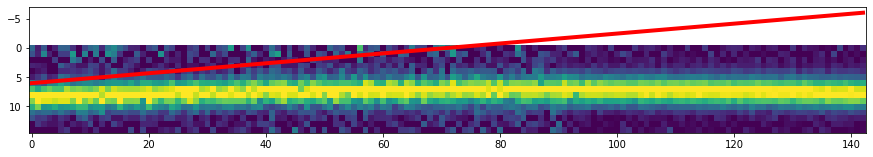

34968.10960442204


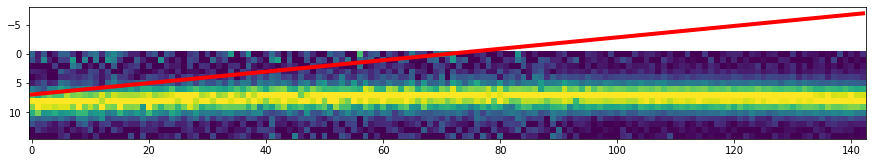

37087.9473420355


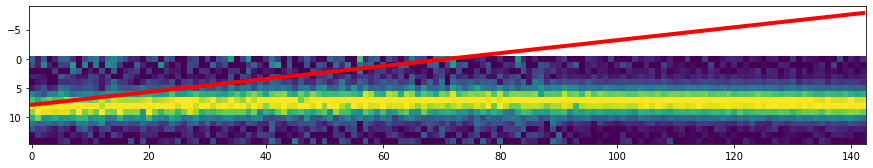

39477.35097331756


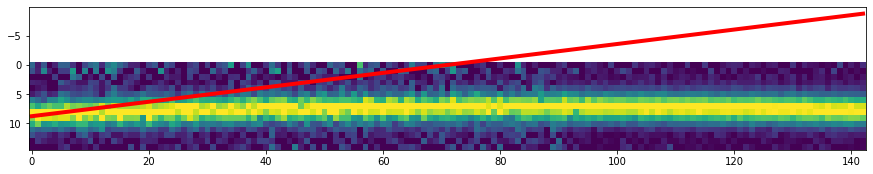

In [12]:
polNum = 2
t0123 = np.random.rand(polNum,1)
t0123
currentCurve = HROW(X_[:polNum,:],t0123)

plt.figure(figsize=(15,5))
plt.imshow(bimg)
plt.plot(currentCurve[0,:], 'r', linewidth = 4)

alpha = 1/143/10
for j in range(10):
    for i in range(143):
        for j in range(polNum):
            t0123[j,0] = t0123[j,0]  - alpha * someStrangeFUnction(X_[:polNum,:], t0123, Y) * X_[j,i]#(i**j)
            pass
    #print("{}\t{:.2f}\t{:.2f}\t{:.2f}\n".format(probing_cost(X_, t0123, Y), t0123[0,0],t0123[1,0],t0123[2,0],t0123[3,0]))
    print(probing_cost(X_[:polNum,:], t0123, Y))
    currentCurve = HROW(X_[:polNum,:],t0123)
    plt.figure(figsize=(15,5))
    plt.imshow(bimg)
    plt.plot(currentCurve[0,:], 'r', linewidth = 4)
    plt.show()

In [13]:
Yval = Y
L = np.zeros((Yval.shape[0], Yval.shape[1]))
L[:,:] = np.arange(Yval.shape[0]).reshape(Yval.shape[0], 1)
    

In [14]:
x =(HROW(X_[:polNum,:], t0123)-L)# * Yval * Yval

In [15]:
x

array([[  8.75637558,   8.63304635,   8.50971711, ...,  -8.50971711,
         -8.63304635,  -8.75637558],
       [  7.75637558,   7.63304635,   7.50971711, ...,  -9.50971711,
         -9.63304635,  -9.75637558],
       [  6.75637558,   6.63304635,   6.50971711, ..., -10.50971711,
        -10.63304635, -10.75637558],
       ...,
       [ -3.24362442,  -3.36695365,  -3.49028289, ..., -20.50971711,
        -20.63304635, -20.75637558],
       [ -4.24362442,  -4.36695365,  -4.49028289, ..., -21.50971711,
        -21.63304635, -21.75637558],
       [ -5.24362442,  -5.36695365,  -5.49028289, ..., -22.50971711,
        -22.63304635, -22.75637558]])

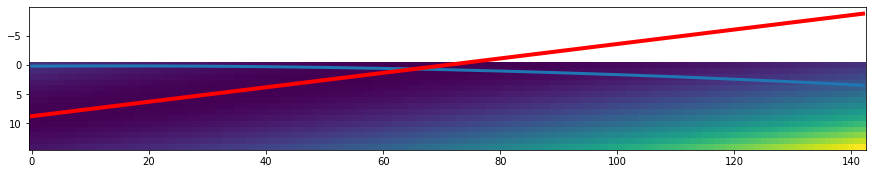

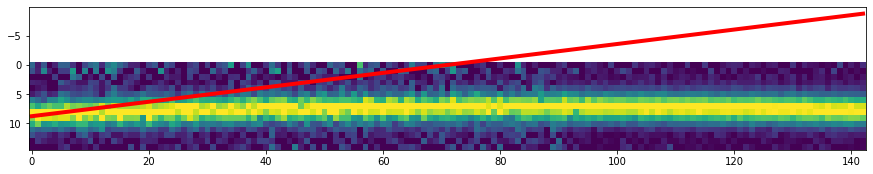

In [16]:
currentCurve = HROW(X_[:polNum,:],t0123)
plt.figure(figsize=(15,5))
plt.imshow(x*x)
plt.plot((np.sum(x*x, axis = 0) - np.mean(x*x)) / np.std(np.sum(x*x, axis = 0) - np.mean(x*x)), linewidth = 3)

plt.plot(currentCurve[0,:], 'r', linewidth = 4)
plt.figure(figsize=(15,5))
plt.imshow(Y)
plt.plot(currentCurve[0,:], 'r', linewidth = 4)

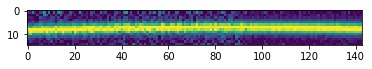

In [18]:
plt.imshow(Y)

In [19]:
YY = np.copy(Y)

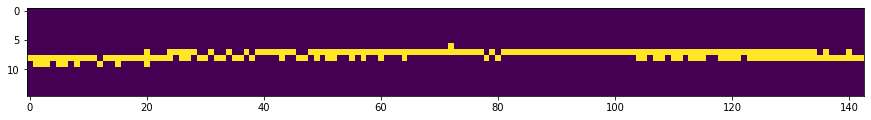

In [33]:
plt.figure(figsize= (15,5))
threshold = .95
YY[np.where(Y<threshold)] = 0
YY[np.where(Y>threshold)] = 1
plt.imshow(YY)